In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

<h4>Conversión de los datos del archivo <.xlsx></h4>

In [298]:
datos = pd.read_excel('mov_parabolico_datos.xlsx')
datos

,0,15,30,45,60,75
0,105.0,185.6,213.5,236.5,207.1,164.5
1,104.8,182.0,215.3,235.8,206.5,164.1
2,109.7,178.0,215.8,237.2,209.9,161.7


In [299]:
g_0 = datos[0]
g_15 = datos[15]
g_30 = datos[30]
g_45 = datos[45]
g_60 = datos[60]
g_75 = datos[75]

<h4> Determinación del promedio de las distintas mediciones de los datos</h4>

In [300]:
def promedio(x):
    return np.mean(x)

g_0_prom = promedio(g_0)
g_15_prom = promedio(g_15)
g_30_prom = promedio(g_30)
g_45_prom = promedio(g_45)
g_60_prom = promedio(g_60)
g_75_prom = promedio(g_75)

prom = [g_0_prom, g_15_prom, g_30_prom, g_45_prom, g_60_prom, g_75_prom]
tabla_1 = pd.DataFrame({'Ángulo (°)': [0, 15, 30, 45, 60, 75], 'Distancia (cm)': prom})
tabla_1

,Ángulo (°),Distancia (cm)
0,0,106.500000
1,15,181.866667
2,30,214.866667
3,45,236.500000
4,60,207.833333
5,75,163.433333


<h4>Ecuación para obtener la velocidad incial del proyectil</h4>

$$
x_{max}=v_{0}\sqrt{\frac{2h}{9}}
$$
ahora, despejando $v_{0}$
$$
v_{0}=\frac{x_{max}}{\sqrt{\frac{2h}{g}}}
$$

sea: $h=25cm$ y $g=9.8\frac{m}{s^2}$

In [301]:
def velocidad(x):
    return x/(np.sqrt(50/980))

v_0 = velocidad(g_0_prom)
tabla_2 = pd.DataFrame({'Ángulo (°)': [0], 'Velocidad (cm/s)': v_0})
tabla_2

,Ángulo (°),Velocidad (cm/s)
0,0,471.495599


Tenemos que $v_{O}=471.49559913110534$ pero debemos considerar que al ser un disparo en un ángulo $\theta = 0^{\circ}$.
Esto significa que el componente $v_{y}=0$ por lo tanto $|v|=v_{x}$. Al empezar a calcular la distancia máxima de los 
diferentes ángulos debemos hallar la respectiva magnitud de Velocidad tomando $v_{x}=471.49559913110534$

Para calcular la distancia máxima de x en un disparo con ángulo de $15^{\circ}$ utilizaremos la siguiente formula:
$$
v_{0}=\frac{v_{0x}}{cos(15^{\circ})}
$$

Ya más adelante debemos aplicar los datos inciales obtenidos a esta ecuación:
$$
x_{max}=x_{0}+\frac{v_{0}cos(\theta)(v_{0}sen(\theta)+\sqrt{v_{0}^2sen^2(\theta)+2gy_{0}})}{g}
$$

Ahora creamos la función que nos permitirá calcular las distancias que obtendrían cada disparo en su respectivo ángulo. 

In [302]:
def distancia(x,y,z):
    return (x*np.cos(y)*(x*np.sin(y)+np.sqrt((x*np.sin(y))**2+2*z*25)))/z


In [303]:
x_15 = distancia(v_0, np.radians(15), 980)
x_30 = distancia(v_0, np.radians(30), 980)
x_45 = distancia(v_0, np.radians(45), 980)
x_60 = distancia(v_0, np.radians(60), 980)
x_75 = distancia(v_0, np.radians(75), 980)
x_t = [g_0_prom,x_15, x_30, x_45, x_60, x_75]
tabla_3 = pd.DataFrame({'Ángulo (°)': [0, 15, 30, 45, 60, 75], 'Distancia (cm)': x_t})
tabla_3

,Ángulo (°),Distancia (cm)
0,0,106.500000
1,15,174.178817
2,30,232.967945
3,45,249.568703
4,60,209.958857
5,75,119.766405


In [304]:
def func(x, a, b):
    return a*x + b

In [305]:
x=[0,15,30,45,60,75]
y = prom


<h4>Determinación de la distancia máxima</h4>
<p> Valiendonos de las herramientas que ofrece python con la libreria "numpy", podemos determinar el alcance máximo teórico que pordría tener el disparo con condiciones ideales, sea resistencia al aire, margen de error mínimo, entre otros.</p>

In [306]:
x = np.linspace(np.radians(0), np.radians(90), 10000)
y = distancia(v_0, x, 980)
l = np.argmax(y)
x[l]
np.degrees(x[l])
tabla_4 = pd.DataFrame({'Ángulo (˚)':[np.degrees(x[l])], 'Distancia (cm)':[y[l]]})
tabla_4

,Ángulo (˚),Distancia (cm)
0,42.151215,250.601085


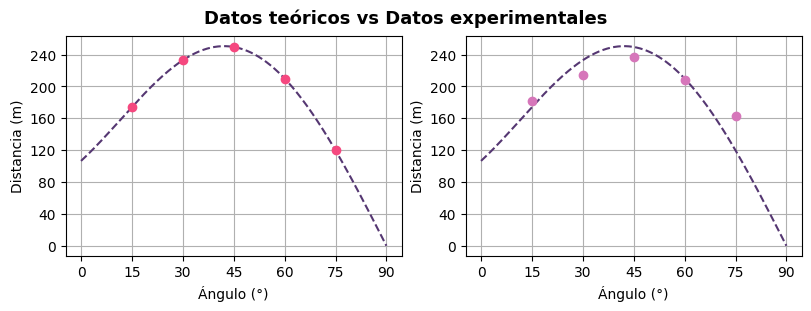

In [307]:
x = np.linspace(np.radians(0), np.radians(90), 1000)
y = distancia(v_0, x, 980)
x = np.degrees(x)
fig = plt.figure(figsize=(8, 3), layout="constrained")
fig.suptitle('Datos teóricos vs Datos experimentales', fontsize=13, fontweight='bold')
spec = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(spec[0, 0])
ax1.plot(x, y, label='Distancia recorrida', linestyle= '--', color='#553772')
ax1.plot(15,distancia(v_0, np.radians(15), 980), 'o', label='15°',color='#f5487f')
ax1.plot(30,distancia(v_0, np.radians(30), 980), 'o', label='30°',color='#f5487f')
ax1.plot(45,distancia(v_0, np.radians(45), 980), 'o', label='45°',color='#f5487f')
ax1.plot(60,distancia(v_0, np.radians(60), 980), 'o', label='60°',color='#f5487f')
ax1.plot(75,distancia(v_0, np.radians(75), 980), 'o', label='75°',color='#f5487f')
ax1.set_xlabel('Ángulo (°)')
ax1.set_ylabel('Distancia (m)')
ax1.set_xticks(np.arange(0,100,15))
ax1.set_yticks(np.arange(0, 260, 40))
ax1.grid()
ax2 = fig.add_subplot(spec[0, 1])
ax2.plot(x, y, linestyle= '--',color='#553772')
ax2.plot(15,prom[1], 'o',color='#d676ba')
ax2.plot(30,prom[2], 'o',color='#d676ba')
ax2.plot(45,prom[3], 'o',color='#d676ba')
ax2.plot(60,prom[4], 'o',color='#d676ba')
ax2.plot(75,prom[5], 'o',color='#d676ba')
ax2.set_xticks(np.arange(0,100,15))
ax2.set_yticks(np.arange(0, 260, 40))
ax2.set_xlabel('Ángulo (°)')
ax2.set_ylabel('Distancia (m)')
ax2.grid()
# fig.legend(loc='lower center',bbox_to_anchor=(1.05, 1), ncol=2)
plt.show()

<h4>Cálculo de la regresión parabólica de los datos teóricos y experimentales</h4>

In [308]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
x = np.array([[0], [15], [30], [45], [60], [75]])
y = prom
y_1 = np.array(y)
poly_reg_1 = PolynomialFeatures(degree=2, include_bias=False)
x_poly_1 = poly_reg_1.fit_transform(x)
x[0]

array([0])

In [309]:
lin_reg_1 = LinearRegression()
lin_reg_1.fit(x_poly_1, y)
b_1,a_1,c_1 = lin_reg_1.coef_[0], lin_reg_1.coef_[1], lin_reg_1.intercept_
b_1,a_1,c_1

(5.764547619047622, -0.06710317460317465, 107.39642857142852)

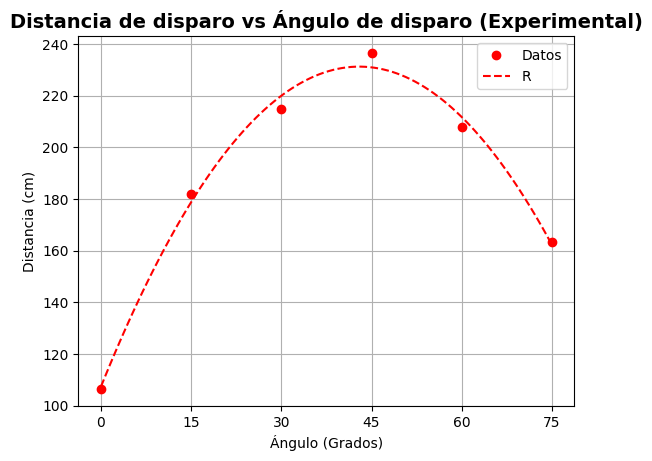

In [310]:
x_1 = np.array(x)
y_1 = np.array(y)

x_new_1 = np.linspace(0, 75, 100)
y_new_1 = a_1*x_new_1**2 + b_1*x_new_1 + c_1

plt.title("Distancia de disparo vs Ángulo de disparo (Experimental)", fontsize=14, fontweight='bold')
plt.plot(x_1, y_1, 'o', label='Datos', color='red')
plt.xticks(np.arange(0, 90, 15))
plt.yticks(np.arange(100, 260, 20))
plt.xlabel('Ángulo (Grados)')
plt.ylabel('Distancia (cm)')
plt.grid()
plt.plot(x_new_1, y_new_1,linestyle="--" , label='R', color='red')
plt.legend()
plt.show()


In [311]:
x = np.array([[0], [15], [30], [45], [60], [75]])
y= np.array(x_t)
poly_reg = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_reg.fit_transform(x)
x[0]

array([0])

In [312]:
x_poly[0]

array([0., 0.])

In [313]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
b,a,c = lin_reg.coef_[0], lin_reg.coef_[1], lin_reg.intercept_

In [314]:
a,b,c

(-0.09388509831141278, 7.403806953320764, 98.15204219010019)

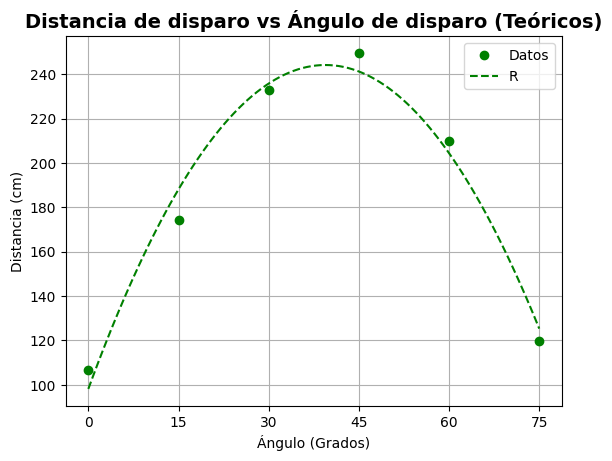

In [315]:
x=[0,15,30,45,60,75]

x_new = np.linspace(0, 75, 100)
y_new = a*x_new**2 + b*x_new + c

plt.title("Distancia de disparo vs Ángulo de disparo (Teóricos)", fontsize=14, fontweight='bold')
plt.plot(x, y, 'o', label='Datos', color='green')
plt.xticks(np.arange(0, 90, 15))
plt.yticks(np.arange(100, 260, 20))
plt.xlabel('Ángulo (Grados)')
plt.ylabel('Distancia (cm)')
plt.grid()
plt.plot(x_new, y_new,linestyle="--" , label='R', color='green')
plt.legend()
plt.show()

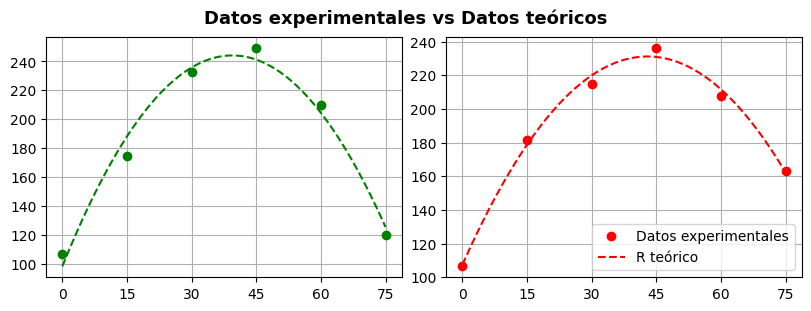

In [316]:
fig = plt.figure(figsize=(8, 3), layout="constrained")
spec = fig.add_gridspec(1, 2)

ax10 = fig.add_subplot(spec[0, 0])
ax10.plot(x, y, 'o', label='Datos teóricos', color='green')
ax10.plot(x_new, y_new,linestyle="--" , label='R experimental', color='green')
ax10.grid()
ax10.set_xticks(np.arange(0, 90, 15))
ax10.set_yticks(np.arange(100, 260, 20))

ax11 = fig.add_subplot(spec[0, 1])
ax11.plot(x_1, y_1, 'o', label='Datos experimentales', color='red')
ax11.plot(x_new_1, y_new_1,linestyle="--" , label='R teórico', color='red')
ax11.set_xticks(np.arange(0, 90, 15))
ax11.set_yticks(np.arange(100, 260, 20))
ax11.grid()

fig.suptitle('Datos experimentales vs Datos teóricos', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

Ecuación vectorial de posición:

$$ \vec{r}_{(t)} = x_{(t)}\hat{i}+y_{(t)}\hat{j}$$

Ahora aplicando las ecuaciones de posición del movimiento parabólico:

$$\vec{r}_{(t)} = (v_{0}cos(\theta)t)\hat{i}+(h+v_{o}sen(\theta)t-\frac{1}{2}gt^2)\hat{j}$$

Tiempo de vuelo:

Se obtinene con la siguiente ecuación:

$$t_{vuelo} = \frac{v_{0}sen(\theta)\pm \sqrt{v_{0}^{2}sen^2(\theta)+2gh}}{g}$$

Para movimiento semiparabólico utilizamos la siguiente formula:

$$t= \sqrt{\frac{2h}{g}}$$

In [317]:

#Tiempo
t_0 = np.sqrt(2*25/980)

t_vuelo_0 = (v_0*np.sin(0)+np.sqrt((v_0*np.sin(0))**2+2*980*25))/980
t_vuelo_15 = (v_0*np.sin(np.radians(15))+np.sqrt((v_0*np.sin(np.radians(15)))**2+2*980*25))/980
t_vuelo_30 = (v_0*np.sin(np.radians(30))+np.sqrt((v_0*np.sin(np.radians(30)))**2+2*980*25))/980
t_vuelo_45 = (v_0*np.sin(np.radians(45))+np.sqrt((v_0*np.sin(np.radians(45)))**2+2*980*25))/980
t_vuelo_60 = (v_0*np.sin(np.radians(60))+np.sqrt((v_0*np.sin(np.radians(60)))**2+2*980*25))/980
t_vuelo_75 = (v_0*np.sin(np.radians(75))+np.sqrt((v_0*np.sin(np.radians(75)))**2+2*980*25))/980
tabla_5 = pd.DataFrame({'Ángulo (°)': [0, 15, 30, 45, 60, 75], 'Tiempo de vuelo (s)': [t_vuelo_0, t_vuelo_15, t_vuelo_30, t_vuelo_45, t_vuelo_60, t_vuelo_75]})
tabla_5

,Ángulo (°),Tiempo de vuelo (s)
0,0,0.225877
1,15,0.382449
2,30,0.570542
3,45,0.748561
4,60,0.890608
5,75,0.981434


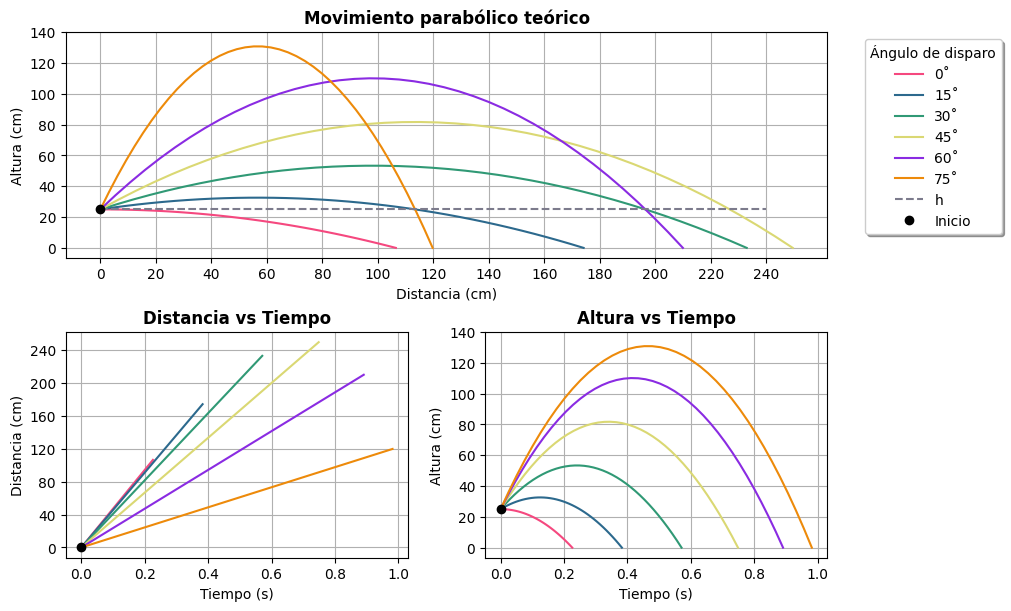

In [318]:
fig = plt.figure(figsize=(10, 6), layout="constrained")
spec = fig.add_gridspec(2, 2)

x_new_2 = np.linspace(0, 240, 40)
h=x_new_2 * 0 + 25

t_0 = np.linspace(0, t_vuelo_0, 40)
t_15 = np.linspace(0, t_vuelo_15, 40)
t_30 = np.linspace(0, t_vuelo_30, 40)
t_45 = np.linspace(0, t_vuelo_45, 40)
t_60 = np.linspace(0, t_vuelo_60, 40)
t_75 = np.linspace(0, t_vuelo_75, 40)

ax0 = fig.add_subplot(spec[0, :])
plt.title('Movimiento parabólico teórico', fontsize=12, fontweight='bold')
ax0.plot(v_0*(np.cos(np.radians(0)))*t_0,25 + v_0*(np.sin(np.radians(0)))*t_0 - 0.5*980*t_0**2,color='#f5487f',label='0˚')
ax0.plot(v_0*(np.cos(np.radians(15)))*t_15,25 + v_0*(np.sin(np.radians(15)))*t_15 - 0.5*980*t_15**2,color='#2c698d', label='15˚')
ax0.plot(v_0*(np.cos(np.radians(30)))*t_30,25 + v_0*(np.sin(np.radians(30)))*t_30 - 0.5*980*t_30**2,color='#309975', label='30˚')
ax0.plot(v_0*(np.cos(np.radians(45)))*t_45,25 + v_0*(np.sin(np.radians(45)))*t_45 - 0.5*980*t_45**2,color='#dad873', label='45˚')
ax0.plot(v_0*(np.cos(np.radians(60)))*t_60,25 + v_0*(np.sin(np.radians(60)))*t_60 - 0.5*980*t_60**2,color='#8a2be2', label='60˚')
ax0.plot(v_0*(np.cos(np.radians(75)))*t_75,25 + v_0*(np.sin(np.radians(75)))*t_75 - 0.5*980*t_75**2,color='#ed8a0a', label='75˚')
ax0.plot(x_new_2,h,linestyle="--" , label='h', color='#7c7b8c')
ax0.plot(0,25,'o',label='Inicio', color='black')
ax0.set_xticks(np.arange(0, 260, 20))
ax0.set_yticks(np.arange(0, 160, 20))
ax0.set_xlabel('Distancia (cm)')
ax0.set_ylabel('Altura (cm)')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", title = 'Ángulo de disparo', shadow = True)
ax0.grid()
ax1 = fig.add_subplot(spec[1, 0])
plt.title('Distancia vs Tiempo', fontsize=12, fontweight='bold')
ax1.plot(t_0, v_0*(np.cos(np.radians(0)))*t_0,color='#f5487f', label='0')
ax1.plot(t_15, v_0*(np.cos(np.radians(15)))*t_15,color='#2c698d',label='15')
ax1.plot(t_30, v_0*(np.cos(np.radians(30)))*t_30,color='#309975',label='30')
ax1.plot(t_45, v_0*(np.cos(np.radians(45)))*t_45,color='#dad873', label='45')
ax1.plot(t_60, v_0*(np.cos(np.radians(60)))*t_60,color='#8a2be2', label='60')
ax1.plot(t_75, v_0*(np.cos(np.radians(75)))*t_75,color='#ed8a0a', label= '75')
ax1.plot(0,0,'o',label='Inicio', color='black')
ax1.set_xticks(np.arange(0, 1.2, 0.2))
ax1.set_yticks(np.arange(0, 260, 40))
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Distancia (cm)')
ax1.grid()
ax2 = fig.add_subplot(spec[1, 1])
plt.title('Altura vs Tiempo', fontsize=12, fontweight='bold')
ax2.plot(t_0, 25 + v_0*(np.sin(np.radians(0)))*t_0 - 0.5*980*t_0**2,color='#f5487f',label='0')
ax2.plot(t_15, 25 + v_0*(np.sin(np.radians(15)))*t_15 - 0.5*980*t_15**2,color='#2c698d', label='15')
ax2.plot(t_30, 25 + v_0*(np.sin(np.radians(30)))*t_30 - 0.5*980*t_30**2,color='#309975',label='30')
ax2.plot(t_45, 25 + v_0*(np.sin(np.radians(45)))*t_45 - 0.5*980*t_45**2,color='#dad873',label='45')
ax2.plot(t_60, 25 + v_0*(np.sin(np.radians(60)))*t_60 - 0.5*980*t_60**2,color='#8a2be2', label='60')
ax2.plot(t_75, 25 + v_0*(np.sin(np.radians(75)))*t_75 - 0.5*980*t_75**2,color='#ed8a0a', label='75')
ax2.plot(0,25,'o',label='Inicio', color='black')
ax2.set_xticks(np.arange(0, 1.2, 0.2))
ax2.set_yticks(np.arange(0, 160, 20))
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Altura (cm)')
ax2.grid()
plt.savefig('mov_parabolico_teorico.png', dpi = 300, bbox_inches = 'tight')
plt.show()
